In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Bagging Accuracy: 1.00
Boosting Accuracy: 1.00

Bagging Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



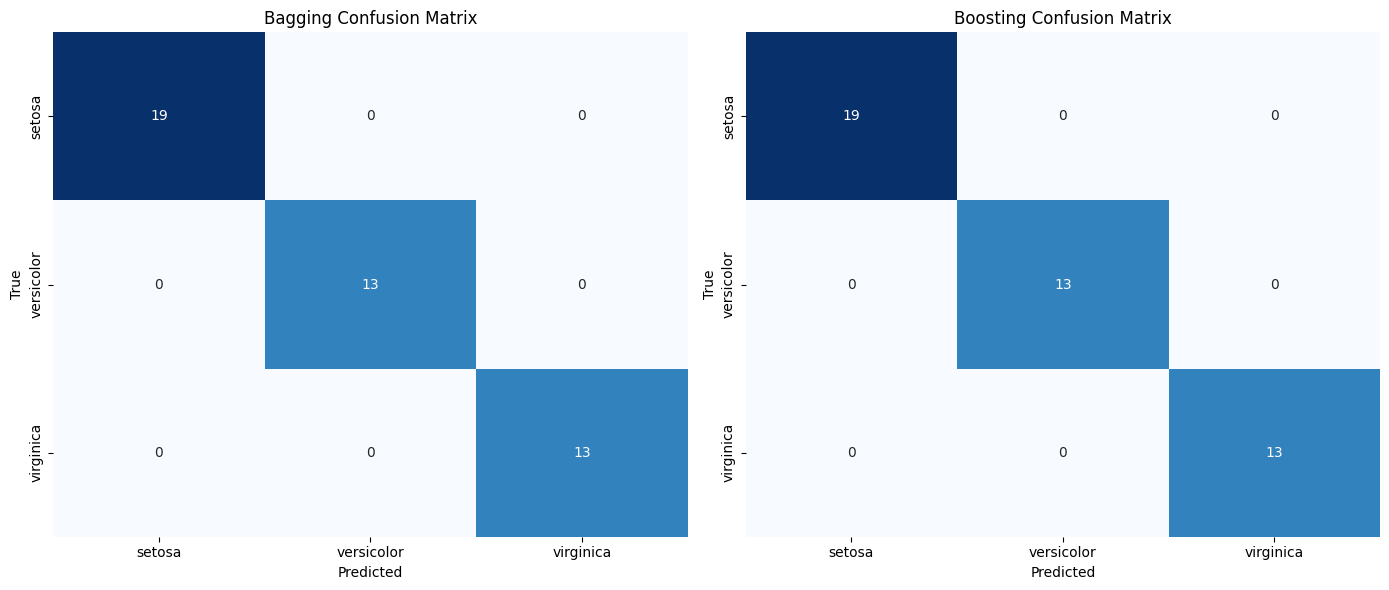

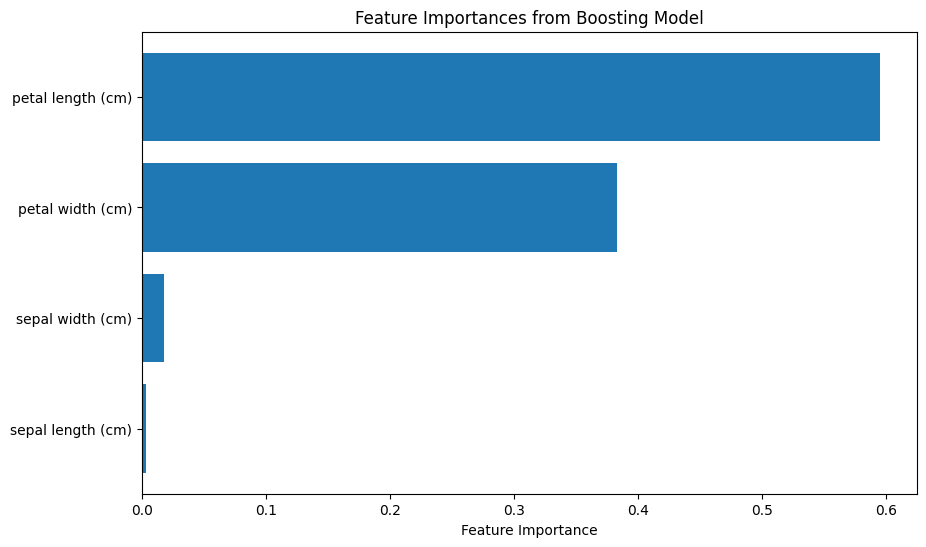

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
boosting_model = GradientBoostingClassifier(n_estimators=50,random_state=42)
boosting_model.fit(X_train, y_train)

boosting_preds = boosting_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)
boosting_accuracy = accuracy_score(y_test, boosting_preds)
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")
print(f"Boosting Accuracy: {boosting_accuracy:.2f}")
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_preds,
target_names=target_names))
print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_preds,
target_names=target_names))
bagging_cm = confusion_matrix(y_test, bagging_preds)
boosting_cm = confusion_matrix(y_test, boosting_preds)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(bagging_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=target_names, yticklabels=target_names,

ax=axes[0])
axes[0].set_title('Bagging Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
sns.heatmap(boosting_cm, annot=True, fmt='d', cmap='Blues', cbar=False,

xticklabels=target_names, yticklabels=target_names,

ax=axes[1])
axes[1].set_title('Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
plt.tight_layout()

plt.show()
feature_importances = boosting_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx],
feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Boosting Model')
plt.show()